### Analysis for Fletcher Project

In [312]:
# code inspired from https://jessesw.com/Data-Science-Skills/

from pymongo import MongoClient
from nltk.corpus import stopwords
import re
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [313]:
# access job_descs3 database with job descriptions

client = MongoClient()
db = client.dsbc
job_descs = db["job_descs3"]

In [33]:
# remove entries with incorrect descriptions

# job_descs.remove({"company": "JPMorgan Chase"})
# job_descs.remove({"company": "Morgan Stanley"})

{u'n': 5, u'ok': 1}

In [314]:
jobs = job_descs.find()

In [243]:
cleaned_descs = []

In [244]:
def clean_desc(job):

    # processing
    join_list = " ".join(job["description"])
    encoded = join_list.encode('utf-8')

    # remove characters
    subbed = re.sub("[_,.:;()\-'%0-9]", "", encoded).split()
    
    
    # remove white space
    remove_white = " ".join(encoded.split())

    # remove stop
    stop = stopwords.words('english')
    nostop = [word for word in subbed if word not in stop]
    remove_bunch = filter(lambda x: len(x) < 12, nostop)

    # stem all words
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word).encode('utf-8') for word in remove_bunch]

    # join 
    stemmed_join = ' '.join(stemmed)
    
    # add to list of descriptions
#     return stemmed_join
    cleaned_descs.append(stemmed_join)

In [245]:
for job in jobs:
    clean_desc(job)

In [249]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
desc_vectors = vectorizer.fit_transform(cleaned_descs)

In [251]:
len(vectorizer.get_feature_names())

21727

In [352]:
mini_kmeans = MiniBatchKMeans(n_clusters = 5)
results = mini_kmeans.fit_transform(desc_vectors)
preds = mini_kmeans.fit_predict(desc_vectors)

In [280]:
ones = sum(preds == 1)
twos = sum(preds == 2)
threes = sum(preds == 3)
fours = sum(preds == 4)
fives = sum(preds == 5)
sixes = sum(preds == 6)
sevens = sum(preds == 7)
eights = sum(preds == 0)

In [335]:
model = BernoulliNB().fit(desc_vectors, titles)
preds = model.predict(desc_vectors)

In [312]:
titles = []

for job in jobs:
    job_lower = job["title"].lower()
    logical = "data" in job_lower and "scientist" in job_lower
    if logical:
        titles.append(1)
    else:
        titles.append(0)

In [354]:
for i in range(5):
    index = list(mini_kmeans.cluster_centers_[i]).index(max(mini_kmeans.cluster_centers_[i]))
    print vectorizer.get_feature_names()[index]

dialog
experi
trademark
job
data


In [4]:
lines = []

for job in jobs:
    for line in job["description"]:
        lines.append(line)

In [158]:
len(lines)

271065

In [201]:
lines[10]

u'data scientists in this organization will design work flows that surround the analytics, ensuring solutions are scalable, adaptable and replicable. familiarity with ibm architectures and frameworks, and the ability to integrate code from other ibm organizations are key job requirements.'

In [211]:
cleaned_lines = []

def clean_line(job):

    # remove characters
    subbed = re.sub("[_,:;()\-'%0-9]", "", job)
    sentences = re.split("\. ", subbed)

    for sentence in sentences:
        words = sentence.split()
        
        # remove stop
        stop = stopwords.words('english')
        nostop = [word for word in words if word not in stop]
        remove_bunch = filter(lambda x: len(x) < 12, nostop)

        # stem all words
        stemmer = PorterStemmer()
        stemmed = [stemmer.stem(word).encode('utf-8') for word in remove_bunch]

        # join 
        stemmed_join = ' '.join(stemmed)

        # add to list of descriptions
    #     return stemmed_join
        cleaned_lines.append(stemmed_join)

In [212]:
for line in lines:
    clean_line(line)

In [214]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
desc_vectors = vectorizer.fit_transform(cleaned_lines)

In [240]:
mini_kmeans = MiniBatchKMeans(n_clusters = 9)
results = mini_kmeans.fit_transform(desc_vectors)
preds = mini_kmeans.fit_predict(desc_vectors)

In [255]:
indexes = []

for i, pred in enumerate(preds):
    if pred == 2:
        indexes.append(i)

In [258]:
subgroup = []

for index in indexes:
    subgroup.append(cleaned_lines[index])

In [265]:
subgroup = filter(lambda x: len(x) >= 1, subgroup)


314780

In [266]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
desc_vectors = vectorizer.fit_transform(subgroup)

In [271]:
mini_kmeans = MiniBatchKMeans(n_clusters = 14)
results = mini_kmeans.fit_transform(desc_vectors)
preds = mini_kmeans.fit_predict(desc_vectors)

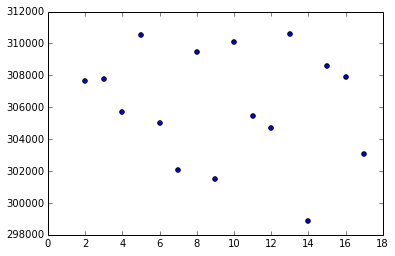

In [269]:
plt.scatter(nclusters, inertias)

In [304]:
for i, cluster in enumerate(mini_kmeans.cluster_centers_):
    sorted_list = sorted(cluster, reverse= True)
    
    print "=== Cluster #" + str(i+1) + " ==="
    for i in range(10):
        val = sorted_list[i]
        index = list(cluster).index(val)
        print vectorizer.get_feature_names()[index]

=== Cluster #1 ===
relat
field
degre
investor
scienc
comput
bachelor
experi
univers
year
=== Cluster #2 ===
experi
year
prefer
degre
requir
bachelor
minimum
educ
data
industri
=== Cluster #3 ===
scientist
data
senior
research
job
engin
associ
team
clinic
develop
=== Cluster #4 ===
program
manag
languag
experi
develop
statist
python
java
skill
support
=== Cluster #5 ===
unit
state
job
emir
kingdom
arab
engin
boe
technolog
english
=== Cluster #6 ===
inform
technolog
job
visit
system
contact
compani
pleas
stock
addit
=== Cluster #7 ===
statu
veteran
race
religion
protect
color
origin
disabl
employ
applic
=== Cluster #8 ===
work
team
environ
abil
experi
project
close
product
develop
data
=== Cluster #9 ===
develop
research
analyst
softwar
busi
associ
product
clinic
design
support
=== Cluster #10 ===
servic
posit
applic
pleas
career
support
requir
appli
compani
select
=== Cluster #11 ===
center
nyu
langon
resourc
medic
associ
career
medicin
brooklyn
care
=== Cluster #12 ===
data
engin
skill

In [311]:
counter = 0

for i, pred in enumerate(preds):
    if pred == 3 and counter < 250:
        counter += 1
        print subgroup[i]

initi new technic program schedul mileston
experi program gpgpu model e.g cuda opencl.
strong comput scienc program abil
ideal candid degre comput scienc mathemat statist similar degre program
solid program experi util java c c++ python
program engin sleep also adapt learn realworld
program background abil prototyp tool use least one follow languag sa python r
program experi work cloud environ
experi linux manag tool like chef / ansibl / etc least one program languag prefer
experi internet market campaign track analyt track lead gener acquisit program
experi plan integr market program
initi new technic program schedul mileston
statist program sa spss and/or r
program skill r python perl bash similar
program skill c++ java plu
disabl veteran cover program pleas notifi us contact human resourc
equal opportun achiev leadership aggress viabl affirm action program
program avail review upon request applic employe contact eo regular busi hour
program skill java c c++.
proven experi java simil

In [285]:
titles = []
for job in jobs:
    titles.append(job["title"])

In [291]:
Counter(titles)

Counter({u'Data Scientist': 233, u'Research Analyst': 62, u'Senior Data Scientist': 47, u'Research Scientist': 30, u'Statistician': 26, u'Software Engineer': 26, u'Market Research Analyst': 25, u'Senior Research Analyst': 19, u'Quantitative Analyst': 17, u'Scientist': 16, u'Statistical Analyst': 15, u'Clinical Laboratory Scientist': 14, u'Associate Scientist': 13, u'Data Engineer': 13, u'Data Analyst': 12, u'Senior Scientist': 11, u'Machine Learning Engineer': 11, u'Senior Research Scientist': 9, u'Sr. Data Scientist': 9, u'Senior Statistician': 9, u'Lead Data Scientist': 9, u'Bioinformatics Scientist': 8, u'Clinical Scientist': 7, u'Staff Scientist': 7, u'Research Associate': 7, u'Business Analyst': 7, u'Computational Biologist': 6, u'Senior Quantitative Analyst': 6, u'Principal Data Scientist': 6, u'Project Manager': 6, u'Senior Software Engineer': 6, u'Operations Research Analyst': 6, u'Sr Data Scientist': 6, u'Data Scientist Job': 6, u'Senior Statistical Programmer': 5, u'Scientist

In [315]:
jobs[0]

{u'_id': ObjectId('556a8d6d50c2a7219b7f93f9'),
 u'company': u'IBM',
 u'desc_key': u'ibm analytics data scientist in usa - jobs at ibm - powered by netmedia',
 u'description': [u'ibm analytics data scientist in usa - jobs at ibm - powered by netmedia',
  u'franais canadien',
  u'ibm analytics data scientist ',
  u'full-time regular',
  u'- any (ma),ma, - any (ny),ny, boston,ma, new york,ny, somers,ny',
  u'25% travel annually',
  u'software development',
  u'sales-incentive jobs only',
  u'we live in a moment of remarkable change and opportunity. data and technology are transforming industries, society and even the workplace by creating professions that did not exist before the emergence of data, cloud, social, and mobile. as the largest technology and consulting employer in the world, ibm is a leader in this global transformation and just the place to continue your career. ',
  u"ibm is looking for data scientists to join the information and insights as a service organization. there, y

In [325]:
python_assoc = []

for line in subgroup:
    if "commun" in line:
        line = line.split()
        for word in line:
            python_assoc.append(word)

In [326]:
Counter(python_assoc)

Counter({'commun': 3175, 'abil': 466, 'effect': 336, 'data': 295, 'work': 290, 'research': 280, 'talent': 265, 'develop': 262, 'team': 257, 'manag': 237, 'servic': 232, 'technic': 210, 'join': 187, 'skill': 182, 'result': 179, 'custom': 170, 'complex': 162, 'commit': 147, 'support': 145, 'partner': 143, 'project': 142, 'divers': 139, 'busi': 138, 'includ': 138, 'experi': 134, 'scientif': 134, 'health': 130, 'product': 121, 'abl': 120, 'excel': 112, 'level': 109, 'client': 107, 'audienc': 106, 'use': 106, 'peopl': 104, 'analysi': 103, 'inform': 102, 'written': 102, 'provid': 101, 'program': 100, 'well': 100, 'clearli': 98, 'design': 97, 'find': 97, 'educ': 96, 'respons': 92, 'build': 92, 'candid': 90, 'intern': 88, 'connect': 88, 'scientist': 88, 'member': 88, 'environ': 86, 'must': 85, 'employe': 85, 'staff': 85, 'solut': 84, 'year': 82, 'engin': 82, 'relat': 81, 'public': 81, 'extern': 80, 'improv': 78, 'technolog': 78, 'depart': 77, 'verbal': 75, 'within': 75, 'group': 74, 'activ': 7